# Alternating Least Squares  Collaborative Filtering

Collaborative filtering considers users’ opinion on different products and recommends the best products based on the products’ previous rankings and the opinion of other similar types of users. 

Here we focus on non-probablistic collaborative filtering algorithms, which can be divided to two categories: **memory-based** and **model-based**. 

Memory-based algorithm is essentially linear algebra calculation and can be implemented with **k-nearest neighbors**. Model-based algorithm involves matrix factorization, and will be detailed in the next notebook. 

**Item-based** collaborative filtering is the common practice in recommender systems. The intuition is to generate predictions based on similarities between items. 

Item-based collaborative filtering was developed by Amazon. It is faster when there are more users than items. It is also more stable because the average rating received by an item usually doesn’t change as quickly as the average rating given by a user to different items. 

The advantage of item-based collaborative filtering is that it does not require knowledge about the product. 

### import requirements

In [26]:
# import library
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from collections import Counter

Source: [surprise documentation](https://surprise.readthedocs.io/en/stable/getting_started.html)

In [52]:
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV

In [3]:
# load data
df = pd.read_csv('../ratings_item0.csv', index_col=0)
df.head(3)

,uid,bid,rating
10,276746,0425115801,0
11,276746,0449006522,0
12,276746,0553561618,0


In [4]:
df.shape

(456182, 3)

In [5]:
num_users = len(set(df['uid']))
num_books = len(set(df['bid']))
print(f'There are {num_users} users and {num_books} books in this dataset.')

There are 13808 users and 18318 books in this dataset.


### data loading

In [6]:
reader = Reader(rating_scale=(1,10))

In [7]:
data = Dataset.load_from_df(df[['uid', 'bid', 'rating']], reader)

## Parameter Search
`GridSearchCV(algo_class, param_grid, measures=[u'rmse', u'mae'], cv=None, refit=False, return_train_measures=False)`

`RandomizedSearchCV`

Parameters
- `param_grid`

        param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [1, 2]},
              'k': [2, 3],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }

Attributes
- `best_estimmator`
- `best_score`
- `best_params`
- `cv_results`
        results_df = pd.DataFrame.from_dict(gs.cv_results)
- ...

In [8]:
# param_grid = {
#     'bsl_options': {'method': ['als', 'sgd'],
#                     #'reg_i': [10],
#                     #'reg_u': [15],
#                     #'reg': [0.02],
#                     #'learning_rate': [0.005],
#                     'n_epochs': [10, 20]},
#     'k': [3, 5, 10, 20],
#     'sim_options': {'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
#                     'min_support': [1, 3],
#                     'user_based': [True, False]}
# }

In [9]:
# gs = GridSearchCV(KNNWithMeans, 
#                   param_grid, 
#                   measures=['rmse', 'mae'], 
#                   cv=3)

In [10]:
#gs.fit(data)

In [11]:
# # best RMSE score
# print(gs.best_score)

In [12]:
best_score = {'rmse': 1.6651286278605182, 'mae': 1.2377969578142525}
print(best_score)

{'rmse': 1.6651286278605182, 'mae': 1.2377969578142525}


In [13]:
# # combination of parameters that gave the best RMSE score
# print(gs.best_params['rmse'])

In [14]:
best_params = {'bsl_options': {'method': 'als', 'n_epochs': 10}, 'k': 20, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}
print(best_params)

{'bsl_options': {'method': 'als', 'n_epochs': 10}, 'k': 20, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}


In [15]:
# results_df = pd.DataFrame.from_dict(gs.cv_results)
# results_df.head()

In [16]:
#results_df.to_csv('knn_results.csv')

Save the hypertuning results so next time I don't have to run that again and can directly use the results. 

The lowest rmse is `1.6651286` when `{'bsl_options': {'method': 'als', 'n_epochs': 10}, 'k': 20, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}` using `KNNWithMeans`.

### evaluation

In [16]:
results_df = pd.read_csv('knn_results.csv')

In [18]:
results_df = results_df[
    ['split0_test_rmse', 'rank_test_rmse', 'params', 
     'param_bsl_options', 'param_k', 'param_sim_options']]

In [ ]:
# results_df = pd.concat([
#     results_df.drop(['param_bsl_options'], axis=1), 
#     results_df['param_bsl_options'].apply(pd.Series)
#     ], axis=1)

In [ ]:
# results_df = pd.concat([
#     results_df.drop(['param_sim_options'], axis=1), 
#     results_df['param_sim_options'].apply(pd.Series)
#     ], axis=1)

In [13]:
# results_df.to_csv('als_results_cleaned.csv')

In [14]:
results_df = pd.read_csv('als_results_cleaned.csv', index_col=0)
results_df.columns=

In [15]:
results_df.sort_values(by='rank_test_rmse')[:5]

,split0_test_rmse,rank_test_rmse,params,param_k,0,0.1
177,1.663016,1,"{'bsl_options': {'method': 'sgd', 'n_epochs': ...",20,"{'method': 'sgd', 'n_epochs': 10}","{'name': 'cosine', 'min_support': 1, 'user_bas..."
241,1.663016,2,"{'bsl_options': {'method': 'sgd', 'n_epochs': ...",20,"{'method': 'sgd', 'n_epochs': 20}","{'name': 'cosine', 'min_support': 1, 'user_bas..."
49,1.663016,3,"{'bsl_options': {'method': 'als', 'n_epochs': ...",20,"{'method': 'als', 'n_epochs': 10}","{'name': 'cosine', 'min_support': 1, 'user_bas..."
113,1.663016,4,"{'bsl_options': {'method': 'als', 'n_epochs': ...",20,"{'method': 'als', 'n_epochs': 20}","{'name': 'cosine', 'min_support': 1, 'user_bas..."
161,1.668153,5,"{'bsl_options': {'method': 'sgd', 'n_epochs': ...",10,"{'method': 'sgd', 'n_epochs': 10}","{'name': 'cosine', 'min_support': 1, 'user_bas..."


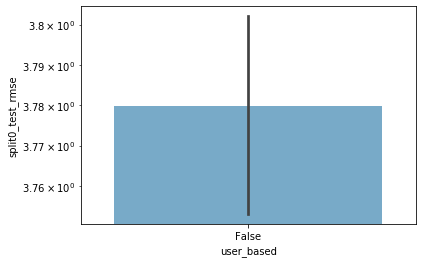

In [3]:
sns.barplot(x=results_df['user_based'], y=results_df['split0_test_rmse'], palette='Blues')
plt.yscale('log')

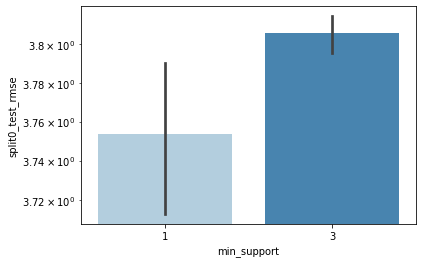

In [5]:
sns.barplot(x=results_df['min_support'], y=results_df['split0_test_rmse'], palette='Blues')
plt.yscale('log')

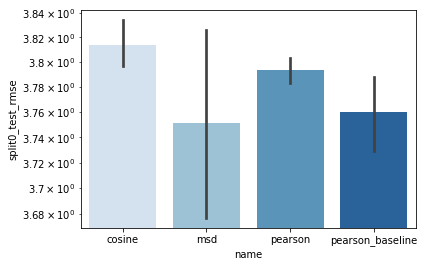

In [6]:
sns.barplot(x=results_df['name'], y=results_df['split0_test_rmse'], palette='Blues')
plt.yscale('log')

In [ ]:
sns.barplot(x=results_df['n_epochs'], y=results_df['split0_test_rmse'], palette='Blues')
plt.yscale('log')

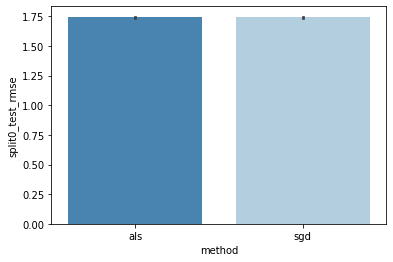

In [28]:
sns.barplot(x=results_df['method'], y=results_df['split0_test_rmse'], palette='Blues_r')

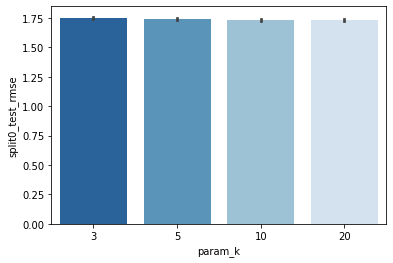

In [29]:
sns.barplot(x=results_df['param_k'], y=results_df['split0_test_rmse'], palette='Blues_r')

In [30]:
results_df.sort_values(by='rank_test_rmse')[:3]

,split0_test_rmse,rank_test_rmse,params,param_k,method,n_epochs,name,min_support,user_based
177,1.663016,1,"{'bsl_options': {'method': 'sgd', 'n_epochs': ...",20,sgd,10,cosine,1,False
241,1.663016,2,"{'bsl_options': {'method': 'sgd', 'n_epochs': ...",20,sgd,20,cosine,1,False
49,1.663016,3,"{'bsl_options': {'method': 'als', 'n_epochs': ...",20,als,10,cosine,1,False


## get top-N recommendations for each user
Source: [documentation](https://surprise.readthedocs.io/en/stable/FAQ.html)

We first train an SVD algorithm on the whole dataset, and then predict all the ratings for the pairs (user, item) that are not in the training set. We then retrieve the top-10 prediction for each user.

In [31]:
def get_top_n(predictions, n=10):
    # map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [32]:
trainset, testset = train_test_split(data, test_size=.25)

In [33]:
algo = KNNWithMeans(k=20, 
                    bsl_options={'method':'als', 'n_epochs':10}, 
                    sim_options={'name':'cosine', 'min_support':1, 
                                 'user_based':False})

In [34]:
predictions = algo.fit(trainset).test(testset)

Computing the cosine similarity matrix...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.


In [35]:
#top_10 = get_top_n(predictions, n=10)

In [36]:
# # Print the recommended items for each user
# for uid, user_ratings in top_10.items():
#     pass
#     #print(uid, [bid for (bid, _) in user_ratings])

In [37]:
test_df = pd.DataFrame(testset, columns=['uid', 'bid', 'rating'])
test_df.head(3)

,uid,bid,rating
0,131027,044661095X,0.0
1,11676,0679753338,0.0
2,128835,0345370775,8.0


In [38]:
test_df[(test_df['uid']==30735)].sort_values(by='rating', ascending=False)[:10]['bid']

111649    0805059555
104405    0553284789
39013     0743225325
67349     0553280341
86128     0064401103
89804     0590353403
21784     0312195516
8260      0805036504
93291     0679426159
15939     059035342X
Name: bid, dtype: object

In [39]:
top_10 = get_top_n(predictions, n=10)

In [40]:
top_10[30735]

[('0590353403', 10),
 ('0971263906', 9.677777777777777),
 ('0425173097', 8.86552512540561),
 ('044651747X', 8.854945054945055),
 ('0064401103', 8.568078959460262),
 ('0805059555', 8.541186179665477),
 ('0061056014', 8.384615384615385),
 ('0064408582', 8.184615384615386),
 ('0425178005', 8.058049970126204),
 ('0446604100', 7.244131455399061)]

In [41]:
bought = set(test_df[test_df['uid']==30735].sort_values(by='rating', ascending=False)[:10]['bid'])
predicted = set([bid for bid, rating in top_10[30735]])
bought.intersection(predicted)

{'0064401103', '0590353403', '0805059555'}

In [42]:
# whether our top n recommended books is user's top n rating
len(bought.intersection(predicted)) / len(predicted)

0.3

In [43]:
n = 10
top_n = get_top_n(predictions, n=n)
accuracy = []

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    bought = set(test_df[test_df['uid']==uid].sort_values(
        by='rating', ascending=False)[:n]['bid'])
    predicted = set([bid for bid, rating in user_ratings])
    rate = len(bought.intersection(predicted)) / len(predicted)
    accuracy.append(rate)
print(sum(accuracy)/len(accuracy))

0.9184002529244383


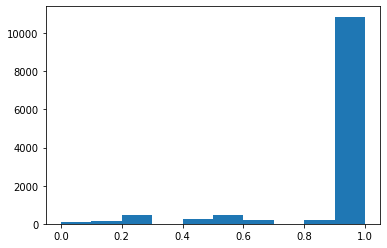

In [44]:
plt.hist(accuracy)
plt.show()

In [45]:
n = np.arange(1,21,1)
avg_accuracy = []

for i in n:
    top_n = get_top_n(predictions, n=i)
    accuracy = []
    
    for uid, user_ratings in top_n.items():
        bought = set(test_df[test_df['uid']==uid].sort_values(
            by='rating', ascending=False)[:i]['bid'])
        predicted = set([bid for bid, rating in user_ratings])
        rate = len(bought.intersection(predicted)) / len(predicted)
        accuracy.append(rate)
    
    avg_accuracy.append(sum(accuracy)/len(accuracy))

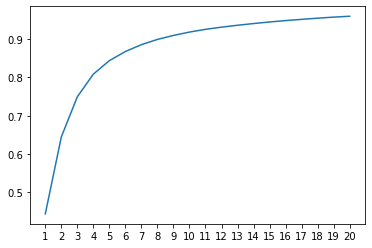

In [46]:
plt.plot(avg_accuracy)
plt.xticks(np.arange(0,20,1),n)
plt.show()

Obviously, our top predictions are more accurate when we recommend more items.

### precision-recall rate

$$accuracy = \frac{(TP+TN)}{(TP+TN+FP+FN)}$$

$$precision = \frac{TP}{(TP+FP)}$$

$$recall = \frac{TP}{(TP+FN)}$$

In [51]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    
    # map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # precision@K: proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # recall@K: proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [53]:
kf = KFold(n_splits=5)

In [54]:
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

Computing the cosine similarity matrix...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
0.3413810791327009
0.2900936388344395
Computing the cosine similarity matrix...
Done computing similarity matrix.
0.34099529346622376
0.28938230692438927
Computing the cosine similarity matrix...
Done computing similarity matrix.
0.3402371805578752
0.2902925004714414
Computing the cosine similarity matrix...
Done computing similarity matrix.
0.34427662517289054
0.2947645144507903
Computing the cosine similarity matrix...
Done computing similarity matrix.
0.3416140904311249
0.2926908581944796


We have an average `0.34` precision rate and `0.29` recall rate. 

## Issues in collaborative filtering

* Sparseness in user-item matrix (sparsity=$1-|R|/|I|*|U|$)
* Cold start for users and items

Next, we would try to resolve these issues using matrix factorization.